In [742]:
#Importing Necessary libraries and Warnings
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
#To display maximum rows
pd.set_option("display.max_rows",1000)

### Step 1: Reading the Data and getting the insigths from the data using EDA 

In [743]:
#Importing csv file
df=pd.read_csv('day.csv')

In [744]:
#Checking the data in the csv file
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [745]:
#Checking the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [746]:
#Checking the no. of rows and columns
df.shape

(730, 16)

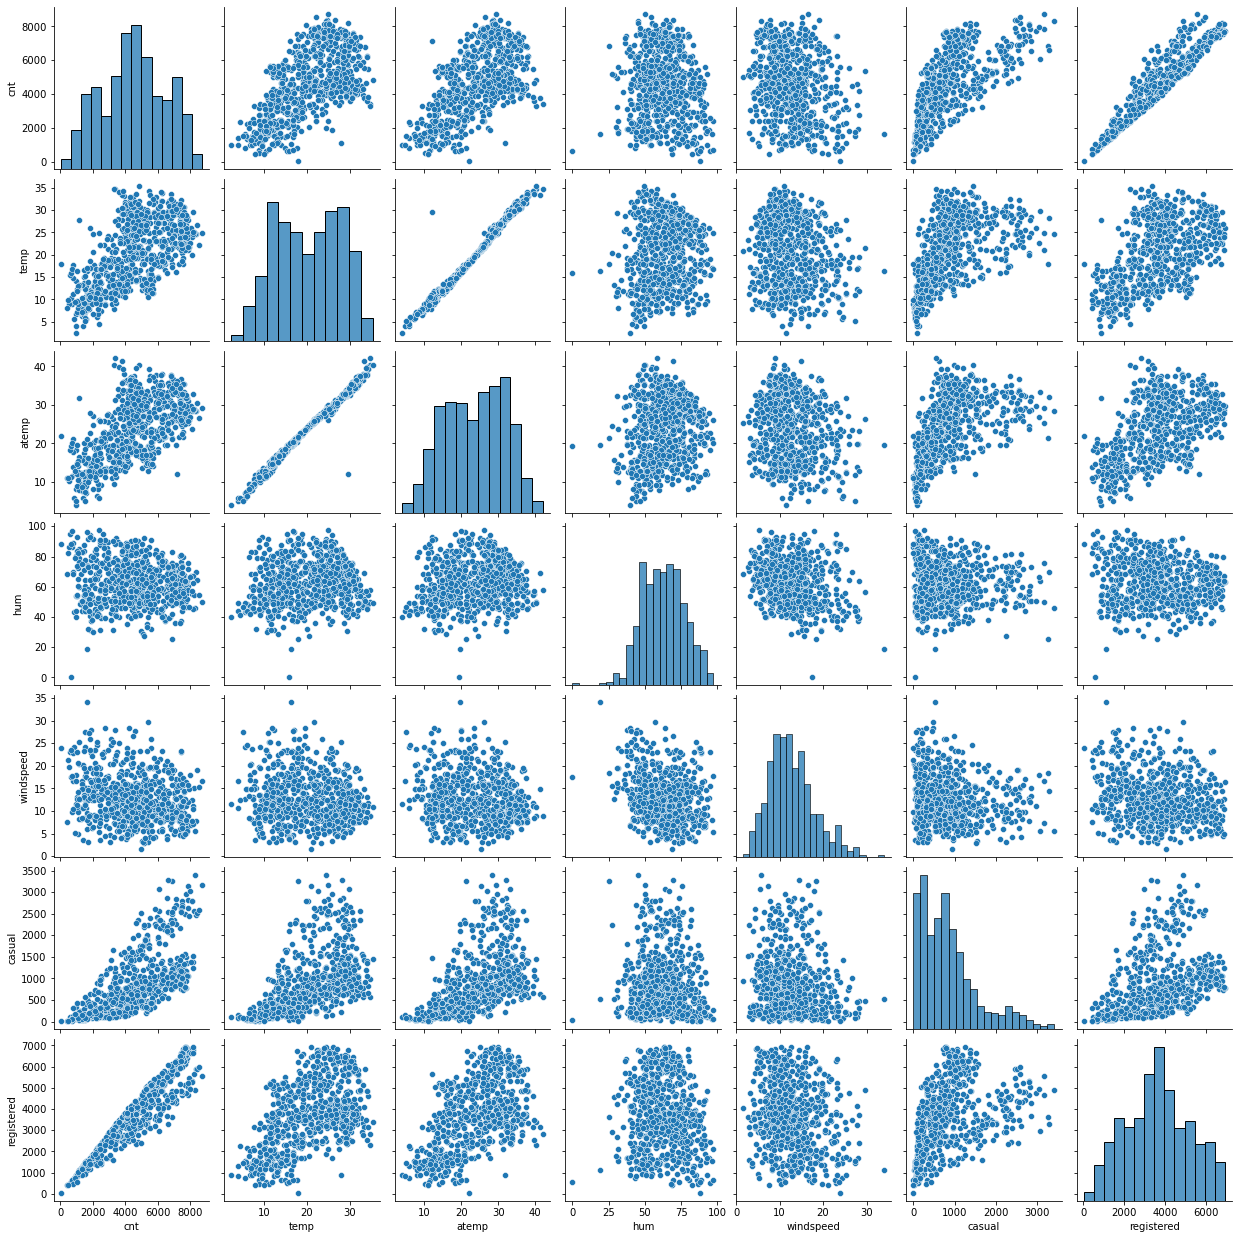

In [747]:
# Pair Plot for numerical variables
vars=["cnt","temp","atemp","hum","windspeed","casual","registered"]
sns.pairplot(df[vars])
plt.show()

# Inferences on pairplot of numerical variables
1. When compared to column cnt - temp, atemp, casual and registered 
shows a upward moving trend through which we can create a linear line to predict the actual values.
2. Similary while comparing temp, atemp, casual and registered with each other some of the columns are 
showing a upward moving trend through which we can create a linear line to predict the actual values.

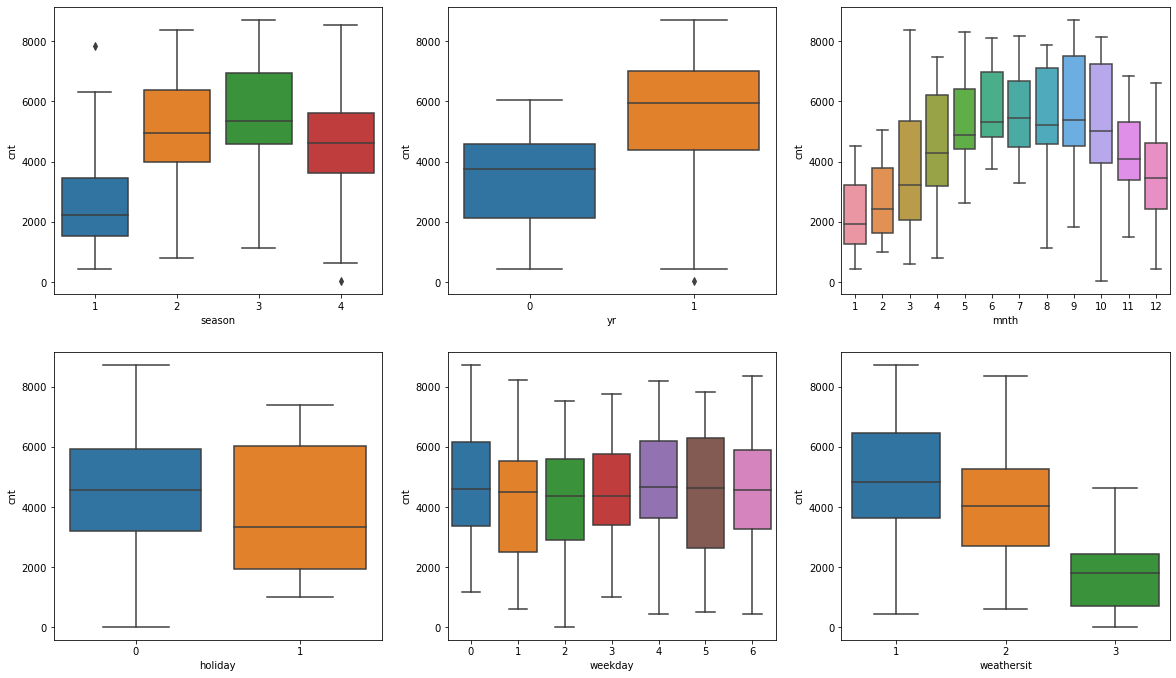

In [748]:
# Box Plots for categorical variables
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

# Inferences on categorical variables using box plot
1. We are keeping cnt variable as our target variable and plotting the box plot for categorical variables accordingly.
2. In the fall season the boom bikes are registered maximum followed by winter summer and spring.
3. Registered users has shown a significant increase from the year 2018 to 2019 which is a good sign.
4. When compared month wise the registered users are increasingly from Jan to Sept but after that the 
   registration of users is decresing slowly which needs to be checked.
5. When there is not a holiday count of registration was more compared to a holiday.
6. Maximum no. of users have registered on monday followed by sunday and the least no. of users registered is on wednesday.
7. When the weather was Clear we had the maximum no. of registered users and 
   the least no. of registered users we have is when the weather was Rainy/Snowy.

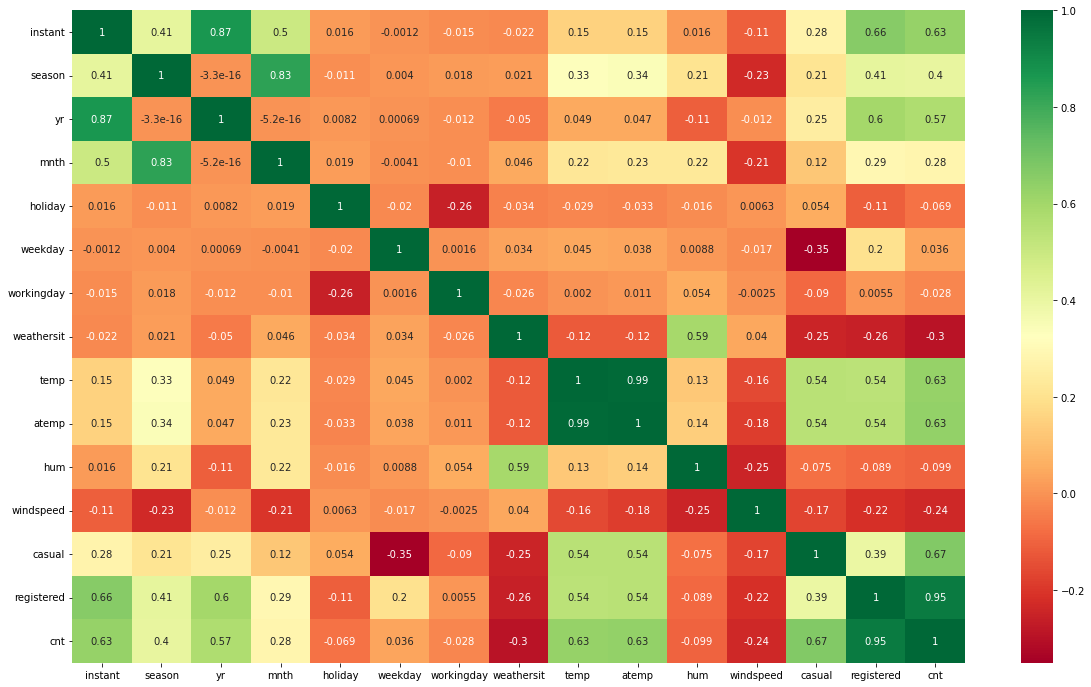

In [749]:
# checking corelations among the variables using a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

#### 1. The Lightest area shows a Positive Coorelation
#### 2. The Darkest area shows a Negative Coorelation

## When compared to target variable cnt we can see the positive coorelation in the below columns.
1. registered
2. casual
3. temp and atemp
4. yr
5. instant

### Step 2: Pre-processing the data

In [750]:
#Dropping the columns that are not required
df=df.drop(columns=['instant','dteday','casual','registered'])

In [751]:
#checking if the columns are dropped or not
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [752]:
# Now we will convert all non binary categorical columns to their original values one by one 
#so that we can create dummy variables.
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [753]:
# Mapping the Nos to their Orginal Values
df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [754]:
# As we can see below the code is successfully executed
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [755]:
# Now we will create a dummy variable for season column
season=pd.get_dummies(df.season, drop_first=True)

In [756]:
# Now we will check the if the dummy variable is created or not

#season.value_counts()
#season.head()
season.describe()

,spring,summer,winter
count,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836
std,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [757]:
# Now we will concat the dummy variable with our dataset
df=pd.concat([df,season], axis=1)

In [758]:
# Lets check if the column has concatenated or not
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [759]:
# As we don't require the Season column any more so we will drop the same.
df=df.drop(columns=['season'])

In [760]:
#checking if the columns has been dropped or not
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [761]:
# Checking the mnth column
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [762]:
# Similarly now we will work on mnth column
df.mnth=df.mnth.map({1:'jan', 2:'feb', 3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [763]:
# Checking the value of the mnth column
df.mnth.value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [764]:
# Now we will create a dummy variable for mnth column
mnth=pd.get_dummies(df.mnth, drop_first=True)

In [765]:
# Now we will check the if the dummy variable is created or not

#mnth.value_counts()
#mnth.head()
mnth.describe()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [766]:
# Now we will concat the dummy variable with our dataset
df=pd.concat([df,mnth], axis=1)

In [767]:
# Lets check if the column has concatenated or not
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [768]:
# As we don't require the mnth column any more so we will drop the same.
df=df.drop(columns=['mnth'])

In [769]:
#checking if the columns has been dropped or not
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [770]:
# Checking the weekday column
df.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [771]:
# Similarly now we will work on weekday column
df.weekday=df.weekday.map({0:'mon', 1:'tues', 2:'wed',3:'thurs',4:'fri',5:'sat',6:'sun'})

In [772]:
# Checking the value of the mnth column
df.weekday.value_counts()

tues     105
wed      105
thurs    104
fri      104
sat      104
sun      104
mon      104
Name: weekday, dtype: int64

In [773]:
# Now we will create a dummy variable for mnth column
weekday=pd.get_dummies(df.weekday, drop_first=True)

In [774]:
# Now we will check the if the dummy variable is created or not

#weekday.value_counts()
#weekday.head()
weekday.describe()

,mon,sat,sun,thurs,tues,wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.142466,0.142466,0.142466,0.142466,0.143836,0.143836
std,0.349767,0.349767,0.349767,0.349767,0.351164,0.351164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [775]:
# Now we will concat the dummy variable with our dataset
df=pd.concat([df,weekday], axis=1)

In [776]:
# Lets check if the column has concatenated or not
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,0,0,tues,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,1,0
1,0,0,wed,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,1
2,0,0,thurs,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,0,fri,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,sat,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,1,0,0,0,0


In [777]:
# As we don't require the weekday column any more so we will drop the same.
df=df.drop(columns=['weekday'])

In [778]:
#checking if the columns has been dropped or not
df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,1,0,0,0,0


In [779]:
# Checking the weathersit column
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [780]:
# Similarly now we will work on weathersit column
df.weathersit=df.weathersit.map({1:'clear', 2:'misty', 3:'cloudy'})

In [781]:
# Checking the value of the weathersit column
df.weathersit.value_counts()

clear     463
misty     246
cloudy     21
Name: weathersit, dtype: int64

In [782]:
# Now we will create a dummy variable for weathersit column
weathersit=pd.get_dummies(df.weathersit, drop_first=True)

In [783]:
# Now we will check the if the dummy variable is created or not

#weathersit.value_counts()
#weathersit.head()
weathersit.describe()

,cloudy,misty
count,730.000000,730.000000
mean,0.028767,0.336986
std,0.167266,0.473004
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [784]:
# Now we will concat the dummy variable with our dataset
df=pd.concat([df,weathersit], axis=1)

In [785]:
# Lets check if the column has concatenated or not
df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,oct,sep,mon,sat,sun,thurs,tues,wed,cloudy,misty
0,0,0,1,misty,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,misty,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,1,0,0,0,0,0,0


In [786]:
# As we don't require the weathersit column any more so we will drop the same.
df=df.drop(columns=['weathersit'])

In [787]:
#checking if the columns has been dropped or not
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thurs,tues,wed,cloudy,misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,0,0,0


In [788]:
#We do not require the atemp column as we have the temp column with us the which can be used instead of atemp.
df=df.drop(columns=['atemp'])

In [789]:
# Checking the column info and confirming that all the columns has Non Null Values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  aug         730 non-null    uint8  
 11  dec         730 non-null    uint8  
 12  feb         730 non-null    uint8  
 13  jan         730 non-null    uint8  
 14  jul         730 non-null    uint8  
 15  jun         730 non-null    uint8  
 16  mar         730 non-null    uint8  
 17  may         730 non-null    uint8  
 18  nov         730 non-null    uint8  
 19  oct         730 non-null    u

# Step 3: Splitting the data into Train and Test

In [790]:
# Importing required libraries for dividing the data into train and test
from sklearn.model_selection import train_test_split

In [791]:
# Splitting into train and test
df_train, df_test = train_test_split(df,train_size=0.7, random_state=100)

In [792]:
# Checking the shape of train to confirm the split
df_train.shape

(510, 29)

In [793]:
# Checking the shape of test to confirm the split
df_test.shape

(220, 29)

# Step 4: Rescaling the data

# For rescaling we can use below mentioned two methods.
1. MinMax Scaler
2. Standardisation
---> We will use MinMax scaler as the we have to fit the value of the columns between 0 and 1.

In [794]:
# Importing the MinMax Scaler library
from sklearn.preprocessing import MinMaxScaler

In [795]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# Creating a list of numerical variables
num_vars = ['temp','hum','windspeed','cnt']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thurs,tues,wed,cloudy,misty
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [796]:
# Lets verifiy our numerical variables are between 0 and 1
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


# Step 5: Traning the Model

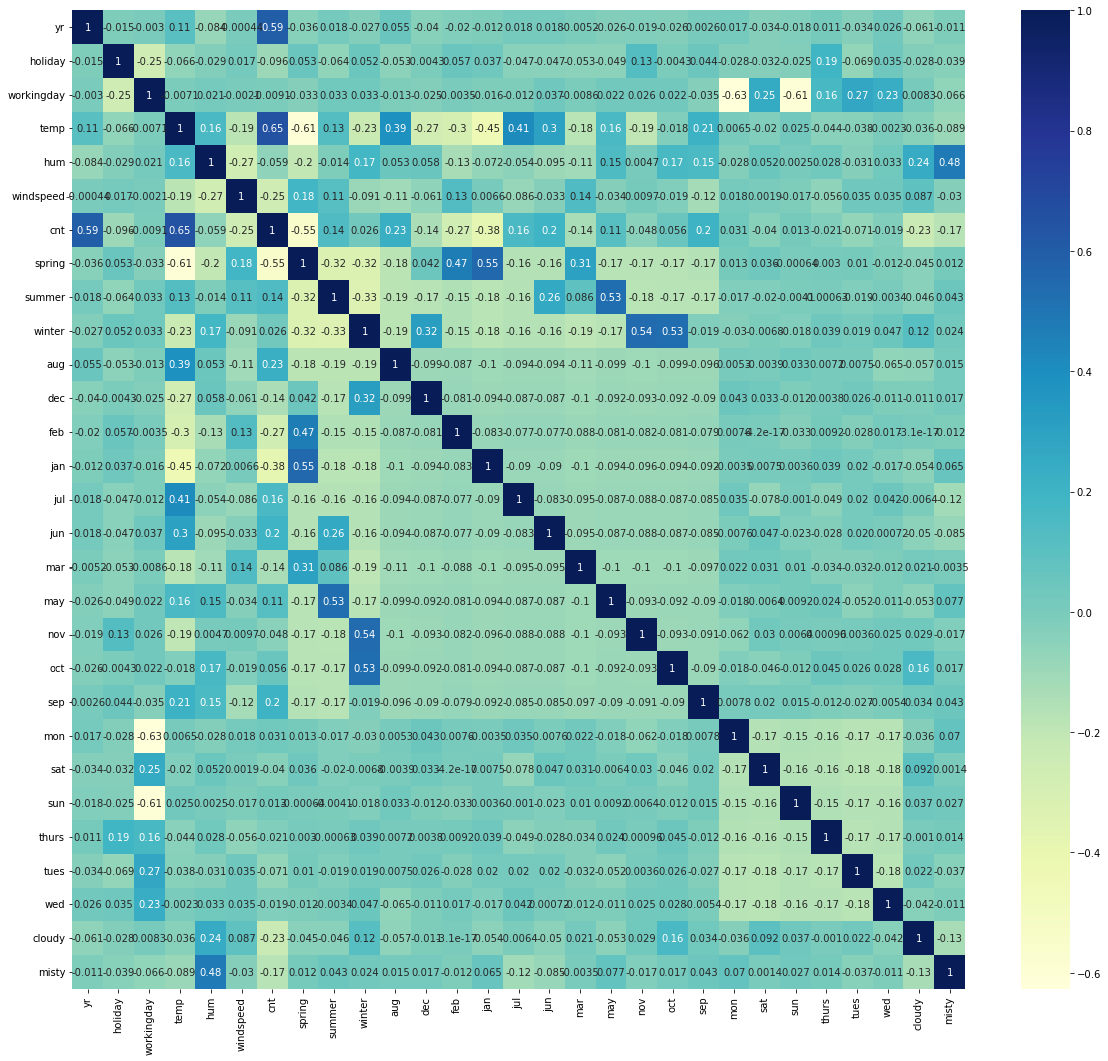

In [797]:
# Heatmap
plt.figure(figsize=(20,18))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

### As we can see in the above Heatmap temp variable has the most corelated users compared to other variable with 0.65 followed by yr variable with 0.59

# Dividing into X_train and y_train sets for the model building

In [798]:
y_train = df_train.pop('cnt')
X_train = df_train

In [799]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,aug,...,oct,sep,mon,sat,sun,thurs,tues,wed,cloudy,misty
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


# Using RFE for feature selection

In [800]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [801]:
# Creating RFE and setting the feature value to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train) #fitting the object on our train dataset

In [802]:
# Cheking the ranking and support for the variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 14),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 5),
 ('sat', False, 13),
 ('sun', False, 4),
 ('thurs', False, 10),
 ('tues', False, 7),
 ('wed', False, 6),
 ('cloudy', True, 1),
 ('misty', True, 1)]

In [803]:
#Assigning a varaible to the support columns
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'cloudy', 'misty'],
      dtype='object')

In [804]:
# Checking the unsupported columns
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thurs', 'tues', 'wed'],
      dtype='object')

In [805]:
#Creating RFE variables with selected variables 
X_train_rfe=X_train[rfe_col]

In [806]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [807]:
# Assigning a LR object which is used to fit the line.

lr = sm.OLS(y_train, X_train_rfe).fit()

In [808]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          8.15e-189
Time:                        20:20:16   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
jul           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sep            0.0755      0.017      4.466      0.000       0.042       0.109
cloudy        -0.2465      0.026     -9.331      0.000      -0.298      -0.195
misty         -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [809]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.52
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.77
4,hum,1.92
12,nov,1.77
10,jan,1.68
15,misty,1.57
9,dec,1.50


In [810]:
#Dropping spring variable as the preferrably VIF cannot be more than 5.00
X_train_rfe.drop(columns='spring', inplace=True)

In [811]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,dec,jan,jul,nov,sep,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1


In [812]:
# Assigning a LR object which is used to fit the line.
lr1 = sm.OLS(y_train, X_train_rfe).fit()

In [813]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          3.50e-188
Time:                        20:20:16   Log-Likelihood:                 509.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2562      0.029      8.899      0.000       0.200       0.313
yr             0.2290      0.008     28.159      0.000       0.213       0.245
holiday       -0.0946      0.026     -3.670      0.000      -0.145      -0.044
temp           0.5550      0.027     20.527      0.000       0.502       0.608
hum           -0.1742      0.038     -4.601      0.000      -0.249      -0.100
windspeed     -0.1971      0.026     -7.634      0.000      -0.248      -0.146
summer         0.0729      0.011      6.548      0.000       0.051       0.095
winter         0.1369      0.013     10.204      0.000       0.111       0.163
dec           -0.0295      0.018     -1.683      0.093      -0.064       0.005
jan           -0.0472      0.018     -2.590      0.010      -0.083      -0.011
jul           -0.0452      0.018     -2.509      0.012      -0.081      -0.010
nov           -0.0288      0.019     -1.548      0.122      -0.065       0.008
sep            0.0903      0.016      5.571      0.000       0.058       0.122
cloudy        -0.2402      0.027     -9.058      0.000      -0.292      -0.188
misty         -0.0514      0.010     -4.906      0.000      -0.072      -0.031
==============================================================================
Omnibus:                       58.341   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.396
Skew:                          -0.649   Prob(JB):                     4.36e-27
Kurtosis:                       5.007   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [814]:
# ReCalculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.76
3,temp,2.32
7,winter,2.09
4,hum,1.90
11,nov,1.71
9,jan,1.67
14,misty,1.55
8,dec,1.48
6,summer,1.44
10,jul,1.43


In [815]:
#Dropping nov variable as preferrably p-value cannot be more than 0.05
X_train_rfe.drop(columns='nov', inplace=True)

In [816]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,dec,jan,jul,sep,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1


In [817]:
# Assigning a LR object which is used to fit the line.
lr2 = sm.OLS(y_train, X_train_rfe).fit()

In [818]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          7.91e-189
Time:                        20:20:16   Log-Likelihood:                 508.71
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     496   BIC:                            -930.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2502      0.029      8.758      0.000       0.194       0.306
yr             0.2290      0.008     28.118      0.000       0.213       0.245
holiday       -0.0991      0.026     -3.863      0.000      -0.149      -0.049
temp           0.5624      0.027     21.111      0.000       0.510       0.615
hum           -0.1736      0.038     -4.580      0.000      -0.248      -0.099
windspeed     -0.1971      0.026     -7.621      0.000      -0.248      -0.146
summer         0.0740      0.011      6.651      0.000       0.052       0.096
winter         0.1263      0.012     10.926      0.000       0.104       0.149
dec           -0.0191      0.016     -1.177      0.240      -0.051       0.013
jan           -0.0431      0.018     -2.388      0.017      -0.079      -0.008
jul           -0.0461      0.018     -2.556      0.011      -0.082      -0.011
sep            0.0930      0.016      5.760      0.000       0.061       0.125
cloudy        -0.2377      0.027     -8.968      0.000      -0.290      -0.186
misty         -0.0511      0.010     -4.865      0.000      -0.072      -0.030
==============================================================================
Omnibus:                       55.188   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.061
Skew:                          -0.625   Prob(JB):                     4.64e-25
Kurtosis:                       4.926   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [819]:
# ReCalculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.81
3,temp,2.25
4,hum,1.90
9,jan,1.63
7,winter,1.55
13,misty,1.55
6,summer,1.44
10,jul,1.43
8,dec,1.26
12,cloudy,1.25


In [820]:
#Dropping dec variable as preferrably p-value cannot be more than 0.05
X_train_rfe.drop(columns='dec', inplace=True)

In [821]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1


In [822]:
# Assigning a LR object which is used to fit the line.
lr3 = sm.OLS(y_train, X_train_rfe).fit()

In [823]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.04e-189
Time:                        20:20:17   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     497   BIC:                            -934.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2449      0.028      8.677      0.000       0.189       0.300
yr             0.2289      0.008     28.098      0.000       0.213       0.245
holiday       -0.0980      0.026     -3.824      0.000      -0.148      -0.048
temp           0.5715      0.026     22.407      0.000       0.521       0.622
hum           -0.1779      0.038     -4.714      0.000      -0.252      -0.104
windspeed     -0.1948      0.026     -7.551      0.000      -0.245      -0.144
summer         0.0756      0.011      6.843      0.000       0.054       0.097
winter         0.1248      0.011     10.859      0.000       0.102       0.147
jan           -0.0382      0.018     -2.174      0.030      -0.073      -0.004
jul           -0.0468      0.018     -2.594      0.010      -0.082      -0.011
sep            0.0944      0.016      5.858      0.000       0.063       0.126
cloudy        -0.2349      0.026     -8.895      0.000      -0.287      -0.183
misty         -0.0504      0.010     -4.804      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       53.439   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.260
Skew:                          -0.611   Prob(JB):                     5.11e-24
Kurtosis:                       4.885   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [824]:
# ReCalculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.59
3,temp,2.06
4,hum,1.88
8,jan,1.55
12,misty,1.55
7,winter,1.53
9,jul,1.43
6,summer,1.41
11,cloudy,1.24
5,windspeed,1.19


# As we can see All the p-values are less than 0.05 and VIF is also less than 5.00

# Now we will try and add the pending constants which was not included in the RFE and see which one can be the best fit

In [825]:
# Aug has the highest coorelation among other variables, So we will add the aug variable
X_train_rfe['aug']=X_train['aug']

In [826]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,aug
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [827]:
# Assigning a LR object which is used to fit the line.
lr4 = sm.OLS(y_train, X_train_rfe).fit()

In [828]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.38e-189
Time:                        20:20:17   Log-Likelihood:                 510.51
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     496   BIC:                            -933.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2486      0.028      8.828      0.000       0.193       0.304
yr             0.2291      0.008     28.232      0.000       0.213       0.245
holiday       -0.0956      0.026     -3.740      0.000      -0.146      -0.045
temp           0.5338      0.031     17.460      0.000       0.474       0.594
hum           -0.1751      0.038     -4.655      0.000      -0.249      -0.101
windspeed     -0.1906      0.026     -7.399      0.000      -0.241      -0.140
summer         0.0914      0.013      6.972      0.000       0.066       0.117
winter         0.1339      0.012     11.005      0.000       0.110       0.158
jan           -0.0363      0.018     -2.069      0.039      -0.071      -0.002
jul           -0.0207      0.021     -0.962      0.337      -0.063       0.022
sep            0.1124      0.018      6.248      0.000       0.077       0.148
cloudy        -0.2355      0.026     -8.949      0.000      -0.287      -0.184
misty         -0.0524      0.010     -4.997      0.000      -0.073      -0.032
aug            0.0432      0.019      2.218      0.027       0.005       0.081
==============================================================================
Omnibus:                       55.026   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.480
Skew:                          -0.604   Prob(JB):                     1.87e-26
Kurtosis:                       5.029   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [829]:
# ReCalculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.76
3,temp,2.98
13,aug,2.07
9,jul,2.05
6,summer,2.01
4,hum,1.88
7,winter,1.73
12,misty,1.56
8,jan,1.55
10,sep,1.50


## As we can see after adding aug varaible the R-squared value was decreased and the p value of the other varaibles were affected so we will drop the variable.

In [830]:
X_train_rfe.drop(columns='aug', inplace=True)

In [831]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1


In [832]:
# Lets add another variable and check
X_train_rfe['jun']=X_train['jun']

In [833]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,jun
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [834]:
# Assigning a LR object which is used to fit the line.
lr5 = sm.OLS(y_train, X_train_rfe).fit()

In [835]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          6.03e-189
Time:                        20:20:17   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2453      0.028      8.698      0.000       0.190       0.301
yr             0.2283      0.008     28.011      0.000       0.212       0.244
holiday       -0.0987      0.026     -3.855      0.000      -0.149      -0.048
temp           0.5859      0.027     21.313      0.000       0.532       0.640
hum           -0.1860      0.038     -4.876      0.000      -0.261      -0.111
windspeed     -0.1967      0.026     -7.622      0.000      -0.247      -0.146
summer         0.0778      0.011      6.976      0.000       0.056       0.100
winter         0.1247      0.011     10.862      0.000       0.102       0.147
jan           -0.0357      0.018     -2.025      0.043      -0.070      -0.001
jul           -0.0537      0.019     -2.871      0.004      -0.090      -0.017
sep            0.0906      0.016      5.558      0.000       0.059       0.123
cloudy        -0.2337      0.026     -8.850      0.000      -0.286      -0.182
misty         -0.0502      0.010     -4.793      0.000      -0.071      -0.030
jun           -0.0240      0.017     -1.391      0.165      -0.058       0.010
==============================================================================
Omnibus:                       52.852   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.219
Skew:                          -0.605   Prob(JB):                     8.61e-24
Kurtosis:                       4.880   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [836]:
# ReCalculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.59
3,temp,2.40
4,hum,1.93
8,jan,1.56
12,misty,1.55
9,jul,1.54
7,winter,1.53
6,summer,1.44
13,jun,1.31
11,cloudy,1.24


In [837]:
# As we can see adding the jun variable increased the p value so we should drop the same.
X_train_rfe.drop(columns='jun', inplace=True)

In [838]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1


In [839]:
# Lets add another variable and check
X_train_rfe['workingday']=X_train['workingday']

In [840]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,workingday
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,1
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [841]:
# Assigning a LR object which is used to fit the line.
lr6 = sm.OLS(y_train, X_train_rfe).fit()

In [842]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.04e-189
Time:                        20:20:17   Log-Likelihood:                 510.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     496   BIC:                            -932.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2560      0.029      8.932      0.000       0.200       0.312
yr             0.2289      0.008     28.189      0.000       0.213       0.245
holiday       -0.1120      0.026     -4.232      0.000      -0.164      -0.060
temp           0.5701      0.025     22.414      0.000       0.520       0.620
hum           -0.1725      0.038     -4.573      0.000      -0.247      -0.098
windspeed     -0.1939      0.026     -7.538      0.000      -0.244      -0.143
summer         0.0763      0.011      6.924      0.000       0.055       0.098
winter         0.1256      0.011     10.958      0.000       0.103       0.148
jan           -0.0382      0.018     -2.178      0.030      -0.073      -0.004
jul           -0.0470      0.018     -2.613      0.009      -0.082      -0.012
sep            0.0939      0.016      5.849      0.000       0.062       0.125
cloudy        -0.2372      0.026     -8.999      0.000      -0.289      -0.185
misty         -0.0527      0.011     -5.014      0.000      -0.073      -0.032
workingday    -0.0187      0.009     -2.030      0.043      -0.037      -0.001
==============================================================================
Omnibus:                       58.663   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.867
Skew:                          -0.676   Prob(JB):                     1.88e-25
Kurtosis:                       4.879   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [843]:
# ReCalculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.46
3,temp,2.06
4,hum,1.89
12,misty,1.56
8,jan,1.55
7,winter,1.53
9,jul,1.43
6,summer,1.42
11,cloudy,1.24
5,windspeed,1.19


# As we can see after adding the Wworkingday column the table stats was not affected at all so we can keep the variable.

In [844]:
# Lets add another variable and check
X_train_rfe['feb']=X_train['feb']

In [845]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,workingday,feb
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0,0


In [846]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,workingday,feb
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0,0


In [847]:
# Assigning a LR object which is used to fit the line.
lr7 = sm.OLS(y_train, X_train_rfe).fit()

In [848]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          9.15e-189
Time:                        20:20:18   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     495   BIC:                            -929.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2715      0.030      8.950      0.000       0.212       0.331
yr             0.2294      0.008     28.267      0.000       0.213       0.245
holiday       -0.1097      0.026     -4.142      0.000      -0.162      -0.058
temp           0.5511      0.028     19.507      0.000       0.496       0.607
hum           -0.1706      0.038     -4.527      0.000      -0.245      -0.097
windspeed     -0.1929      0.026     -7.511      0.000      -0.243      -0.142
summer         0.0701      0.012      5.971      0.000       0.047       0.093
winter         0.1167      0.013      9.112      0.000       0.092       0.142
jan           -0.0515      0.020     -2.638      0.009      -0.090      -0.013
jul           -0.0479      0.018     -2.667      0.008      -0.083      -0.013
sep            0.0916      0.016      5.686      0.000       0.060       0.123
cloudy        -0.2377      0.026     -9.032      0.000      -0.289      -0.186
misty         -0.0530      0.011     -5.047      0.000      -0.074      -0.032
workingday    -0.0183      0.009     -1.995      0.047      -0.036      -0.000
feb           -0.0306      0.020     -1.541      0.124      -0.070       0.008
==============================================================================
Omnibus:                       61.777   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.052
Skew:                          -0.702   Prob(JB):                     3.14e-27
Kurtosis:                       4.943   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [849]:
# ReCalculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.80
3,temp,2.55
8,jan,1.93
7,winter,1.92
4,hum,1.89
6,summer,1.61
12,misty,1.56
14,feb,1.54
9,jul,1.43
11,cloudy,1.24


In [850]:
# As we can see adding the feb variable increased the p value so we should drop the same.
X_train_rfe.drop(columns='feb', inplace=True)

In [851]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,workingday
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,1
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [852]:
# Lets add another variable and check
X_train_rfe['mar']=X_train['mar']

In [853]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,workingday,mar
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0,0


In [854]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,workingday,mar
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0,0


In [855]:
# Assigning a LR object which is used to fit the line.
lr8 = sm.OLS(y_train, X_train_rfe).fit()

In [856]:
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.51e-188
Time:                        20:20:18   Log-Likelihood:                 510.28
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.030      8.522      0.000       0.194       0.310
yr             0.2288      0.008     28.144      0.000       0.213       0.245
holiday       -0.1111      0.027     -4.188      0.000      -0.163      -0.059
temp           0.5746      0.027     21.638      0.000       0.522       0.627
hum           -0.1724      0.038     -4.570      0.000      -0.247      -0.098
windspeed     -0.1944      0.026     -7.549      0.000      -0.245      -0.144
summer         0.0768      0.011      6.943      0.000       0.055       0.099
winter         0.1278      0.012     10.566      0.000       0.104       0.152
jan           -0.0348      0.018     -1.890      0.059      -0.071       0.001
jul           -0.0465      0.018     -2.581      0.010      -0.082      -0.011
sep            0.0946      0.016      5.872      0.000       0.063       0.126
cloudy        -0.2376      0.026     -9.005      0.000      -0.289      -0.186
misty         -0.0527      0.011     -5.009      0.000      -0.073      -0.032
workingday    -0.0186      0.009     -2.016      0.044      -0.037      -0.000
mar            0.0087      0.015      0.585      0.559      -0.021       0.038
==============================================================================
Omnibus:                       58.634   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.928
Skew:                          -0.682   Prob(JB):                     4.96e-25
Kurtosis:                       4.846   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [857]:
# ReCalculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,54.63
3,temp,2.25
4,hum,1.89
8,jan,1.71
7,winter,1.70
12,misty,1.56
9,jul,1.43
6,summer,1.42
11,cloudy,1.24
14,mar,1.23


In [858]:
# As we can see adding the mar variable increased the p value so we should drop the same.
X_train_rfe.drop(columns='mar', inplace=True)

In [859]:
# Lets add another variable and check
X_train_rfe['mon']=X_train['mon']

In [860]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,workingday,mon
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0,1


In [861]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

In [862]:
#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,workingday,mon
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0,1


In [863]:
# Assigning a LR object which is used to fit the line.
lr9 = sm.OLS(y_train, X_train_rfe).fit()

In [864]:
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.1
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.77e-188
Time:                        20:20:18   Log-Likelihood:                 510.18
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     495   BIC:                            -926.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2529      0.030      8.470      0.000       0.194       0.312
yr             0.2289      0.008     28.156      0.000       0.213       0.245
holiday       -0.1094      0.027     -4.001      0.000      -0.163      -0.056
temp           0.5704      0.025     22.397      0.000       0.520       0.620
hum           -0.1723      0.038     -4.564      0.000      -0.246      -0.098
windspeed     -0.1941      0.026     -7.539      0.000      -0.245      -0.144
summer         0.0764      0.011      6.920      0.000       0.055       0.098
winter         0.1256      0.011     10.948      0.000       0.103       0.148
jan           -0.0380      0.018     -2.167      0.031      -0.072      -0.004
jul           -0.0472      0.018     -2.622      0.009      -0.083      -0.012
sep            0.0939      0.016      5.843      0.000       0.062       0.125
cloudy        -0.2368      0.026     -8.969      0.000      -0.289      -0.185
misty         -0.0528      0.011     -5.017      0.000      -0.073      -0.032
workingday    -0.0156      0.012     -1.287      0.199      -0.040       0.008
mon            0.0059      0.015      0.382      0.703      -0.024       0.036
==============================================================================
Omnibus:                       59.556   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.758
Skew:                          -0.685   Prob(JB):                     7.30e-26
Kurtosis:                       4.890   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [865]:
# ReCalculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.72
3,temp,2.06
4,hum,1.89
13,workingday,1.89
14,mon,1.77
12,misty,1.57
8,jan,1.55
7,winter,1.53
9,jul,1.43
6,summer,1.42


In [866]:
# As we can see adding the mon variable increased the p value so we should drop the same.
X_train_rfe.drop(columns='mon', inplace=True)

In [867]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,workingday
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,1
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [868]:
# Lets add another variable and check
X_train_rfe['sun']=X_train['sun']

In [869]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

In [870]:
#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,workingday,sun
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0,0


In [871]:
# Assigning a LR object which is used to fit the line.
lr10 = sm.OLS(y_train, X_train_rfe).fit()    

In [872]:
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.1
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.65e-188
Time:                        20:20:18   Log-Likelihood:                 510.22
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     495   BIC:                            -926.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2596      0.030      8.764      0.000       0.201       0.318
yr             0.2288      0.008     28.141      0.000       0.213       0.245
holiday       -0.1151      0.027     -4.225      0.000      -0.169      -0.062
temp           0.5705      0.025     22.401      0.000       0.520       0.621
hum           -0.1724      0.038     -4.569      0.000      -0.247      -0.098
windspeed     -0.1941      0.026     -7.540      0.000      -0.245      -0.144
summer         0.0764      0.011      6.923      0.000       0.055       0.098
winter         0.1257      0.011     10.957      0.000       0.103       0.148
jan           -0.0380      0.018     -2.166      0.031      -0.072      -0.004
jul           -0.0473      0.018     -2.625      0.009      -0.083      -0.012
sep            0.0939      0.016      5.840      0.000       0.062       0.125
cloudy        -0.2366      0.026     -8.966      0.000      -0.289      -0.185
misty         -0.0528      0.011     -5.020      0.000      -0.074      -0.032
workingday    -0.0223      0.012     -1.877      0.061      -0.046       0.001
sun           -0.0075      0.015     -0.484      0.629      -0.038       0.023
==============================================================================
Omnibus:                       59.766   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.436
Skew:                          -0.686   Prob(JB):                     5.20e-26
Kurtosis:                       4.896   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [873]:
# ReCalculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.87
3,temp,2.06
4,hum,1.89
13,workingday,1.81
14,sun,1.68
12,misty,1.57
8,jan,1.55
7,winter,1.53
9,jul,1.43
6,summer,1.42


In [874]:
# As we can see adding the sun variable increased the p value so we should drop the same.
X_train_rfe.drop(columns='sun', inplace=True)

In [875]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,jan,jul,sep,cloudy,misty,workingday
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,1
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [876]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.04e-189
Time:                        20:20:19   Log-Likelihood:                 510.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     496   BIC:                            -932.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2560      0.029      8.932      0.000       0.200       0.312
yr             0.2289      0.008     28.189      0.000       0.213       0.245
holiday       -0.1120      0.026     -4.232      0.000      -0.164      -0.060
temp           0.5701      0.025     22.414      0.000       0.520       0.620
hum           -0.1725      0.038     -4.573      0.000      -0.247      -0.098
windspeed     -0.1939      0.026     -7.538      0.000      -0.244      -0.143
summer         0.0763      0.011      6.924      0.000       0.055       0.098
winter         0.1256      0.011     10.958      0.000       0.103       0.148
jan           -0.0382      0.018     -2.178      0.030      -0.073      -0.004
jul           -0.0470      0.018     -2.613      0.009      -0.082      -0.012
sep            0.0939      0.016      5.849      0.000       0.062       0.125
cloudy        -0.2372      0.026     -8.999      0.000      -0.289      -0.185
misty         -0.0527      0.011     -5.014      0.000      -0.073      -0.032
workingday    -0.0187      0.009     -2.030      0.043      -0.037      -0.001
==============================================================================
Omnibus:                       58.663   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.867
Skew:                          -0.676   Prob(JB):                     1.88e-25
Kurtosis:                       4.879   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [877]:
# ReCalculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.46
3,temp,2.06
4,hum,1.89
12,misty,1.56
8,jan,1.55
7,winter,1.53
9,jul,1.43
6,summer,1.42
11,cloudy,1.24
5,windspeed,1.19


# After comparing all the models now we have an adjusted R-square of 83.8% and we can see the VIFs and p-values both are within an acceptable range

# Step 6: Residual Analysis

In [878]:
# Predicting the model for errors
y_train_pred = lr6.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

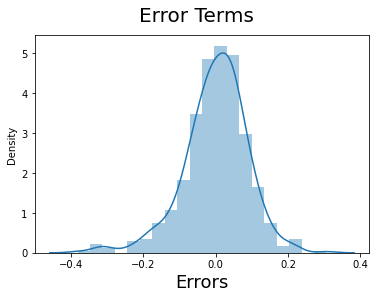

In [879]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)        

# As we can see from the above distribution our errors are normally distributed with Mean 0.

# Step 6: Making Predictions using the final model

In [880]:
#Lets check the numerical variables
num_vars

['temp', 'hum', 'windspeed', 'cnt']

In [881]:
# Now we will apply all the transformations in the test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [882]:
df_test[num_vars].describe()

,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154
std,0.233187,0.148694,0.159584,0.219163
min,0.046591,0.261915,-0.042808,0.048205
25%,0.355429,0.529197,0.198843,0.378595
50%,0.558172,0.625590,0.300126,0.524678
75%,0.755981,0.743798,0.402718,0.677750
max,0.984424,1.002146,0.807474,0.963300


# Dividing into X_test and y_test

In [883]:
y_test = df_test.pop('cnt')
X_test = df_test

In [884]:
# CHecking the features of the final model
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'jan', 'jul', 'sep', 'cloudy', 'misty', 'workingday'],
      dtype='object')

In [885]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thurs', 'tues', 'wed',
       'cloudy', 'misty'],
      dtype='object')

In [886]:
# As we have to keep the common columsn from both the dataset so we will drop the const column.
X_train_rfe.drop(columns='const', inplace=True)

In [887]:
# Dropping variables from X_test
X_test_mo = X_test[X_train_rfe.columns]

In [888]:
# Adding a constant variable 
X_test_mo = sm.add_constant(X_test_mo)

In [889]:
#Now we will predict the values
y_pred = lr6.predict(X_test_mo)

# Step 7: Model Evaluation

Text(0, 0.5, 'y_pred')

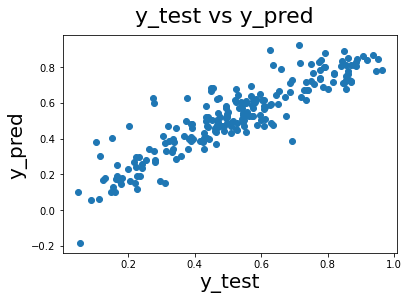

In [890]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=22)              
plt.xlabel('y_test', fontsize=20)                         
plt.ylabel('y_pred', fontsize=20)                        

In [891]:
# We will check the train and test data set
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
print(r2_score(y_train, y_train_pred))

0.8043549129741356
0.8424253780617724


# As we can see above the R-squared value of Train and Test dataset is 84.2% and 80.4% respectively which concludes our model is the best fit. 

In [892]:
# Just for some more clarification we will even check the mean squared error of the data too.
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_pred))

0.007920640604488762
0.00935462887531692


# As we can see that our Mean Squared Error for both Train and Test data set is close to 0 which means our dataset is correctly predicting all the values.